In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATASET_COLUMNS = ["time-interval", "counter-value", "event", "runtime", "percentage"]

## Naive baseline for Branch Instructions

### Load the data

In [3]:
dataset_benign_branch_instructions = pd.read_csv("data/benign-branch-instructions.csv", delimiter=",", header=None)
dataset_benign_branch_instructions = dataset_benign_branch_instructions.dropna(axis=1)
dataset_benign_branch_instructions.columns = DATASET_COLUMNS

dataset_benign_branch_instructions.head()

,time-interval,counter-value,event,runtime,percentage
0,0.010452,673597,branch-instructions,82102818,98.23
1,0.020993,416685,branch-instructions,67141031,80.03
2,0.031488,391423,branch-instructions,72762824,86.69
3,0.041902,552040,branch-instructions,67426486,80.52
4,0.052307,347851,branch-instructions,70607261,84.40


In [4]:
dataset_ransomware_branch_instructions = pd.read_csv("data/ransomware-branch-instructions.csv", delimiter=",", header=None)
dataset_ransomware_branch_instructions = dataset_ransomware_branch_instructions.dropna(axis=1)
dataset_ransomware_branch_instructions.columns = DATASET_COLUMNS

print(dataset_ransomware_branch_instructions.shape)
dataset_ransomware_branch_instructions.head()

(12423, 5)


,time-interval,counter-value,event,runtime,percentage
0,0.010327,354247,branch-instructions,38019191,46.33
1,0.020617,893405,branch-instructions,60558970,73.33
2,0.031023,690527,branch-instructions,46730346,56.46
3,0.041392,337800,branch-instructions,55677350,67.32
4,0.051646,267611,branch-instructions,51213177,62.10


In [5]:
dataset_benign_branch_instructions_observe = dataset_benign_branch_instructions[1000:].copy()
dataset_benign_branch_instructions_observe = dataset_benign_branch_instructions_observe.reset_index()
dataset_benign_branch_instructions_observe["interval"] = dataset_benign_branch_instructions_observe.index + 1

print(dataset_benign_branch_instructions_observe.shape)
dataset_benign_branch_instructions_observe.head()

(410911, 7)


,index,time-interval,counter-value,event,runtime,percentage,interval
0,1000,10.307010,309933,branch-instructions,65909282,80.01,1
1,1001,10.317362,989338,branch-instructions,65917447,80.02,2
2,1002,10.327725,386434,branch-instructions,65911191,80.01,3
3,1003,10.338134,331708,branch-instructions,65913865,80.02,4
4,1004,10.348433,1249317,branch-instructions,65913008,80.02,5


In [6]:
dataset_ransomware_branch_instructions_observe = dataset_ransomware_branch_instructions[1000:].copy()
dataset_ransomware_branch_instructions_observe = dataset_ransomware_branch_instructions_observe.reset_index()
dataset_ransomware_branch_instructions_observe["interval"] = dataset_ransomware_branch_instructions_observe.index + 1

print(dataset_ransomware_branch_instructions_observe.shape)
dataset_ransomware_branch_instructions_observe.head()

(11423, 7)


,index,time-interval,counter-value,event,runtime,percentage,interval
0,1000,10.239505,6237356,branch-instructions,54548836,66.66,1
1,1001,10.249762,6241939,branch-instructions,54542659,66.65,2
2,1002,10.259843,6748256,branch-instructions,54538284,66.65,3
3,1003,10.270070,6374967,branch-instructions,54561237,66.67,4
4,1004,10.280185,6334711,branch-instructions,54527929,66.63,5


### Prepare time series

In [7]:
dataset_benign_branch_instructions_counter = dataset_benign_branch_instructions_observe[["counter-value"]].copy()

print(dataset_benign_branch_instructions_counter.shape)
dataset_benign_branch_instructions_counter.head()

(410911, 1)


,counter-value
0,309933
1,989338
2,386434
3,331708
4,1249317


In [8]:
dataset_ransomware_branch_instructions_counter = dataset_ransomware_branch_instructions_observe[["counter-value"]].copy()

print(dataset_ransomware_branch_instructions_counter.shape)
dataset_ransomware_branch_instructions_counter.head()

(11423, 1)


,counter-value
0,6237356
1,6241939
2,6748256
3,6374967
4,6334711


In [29]:
series_size = 20
start_index = 0
stop = series_size * 200 + series_size
benign_means = list()

for i in range(series_size, stop, series_size):
    benign_mean = dataset_benign_branch_instructions_counter[start_index:i].mean()
    ransomware_mean = dataset_ransomware_branch_instructions_counter[start_index:i].mean()
    if benign_mean >= ransomware_mean:
        print("greater")

len(benign_means)

0

In [24]:
series_size = 20
start_index = 0
stop = series_size * 200 + series_size
ransomware_means = list()

for i in range(series_size, stop, series_size):
    ransomware_means.append(dataset_ransomware_branch_instructions_counter[start_index:i].mean())

len(ransomware_means)

200

In [25]:
benign_means_df = pd.DataFrame(benign_means, columns=["counter-value"])
benign_means_df.head(10)

,counter-value
0,8.993139e+05
1,1.141223e+06
2,1.053838e+06
3,1.094350e+06
4,1.038236e+06
5,9.727030e+05
6,8.966681e+05
7,8.660327e+05
8,9.126873e+05
9,8.987156e+05


In [26]:
ransomware_means_df = pd.DataFrame(ransomware_means, columns=["counter-value"])
ransomware_means_df.head(10)

,counter-value
0,6.872474e+06
1,7.823918e+06
2,7.691078e+06
3,8.224594e+06
4,7.620213e+06
5,7.074469e+06
6,7.200331e+06
7,7.313904e+06
8,7.298930e+06
9,6.950619e+06


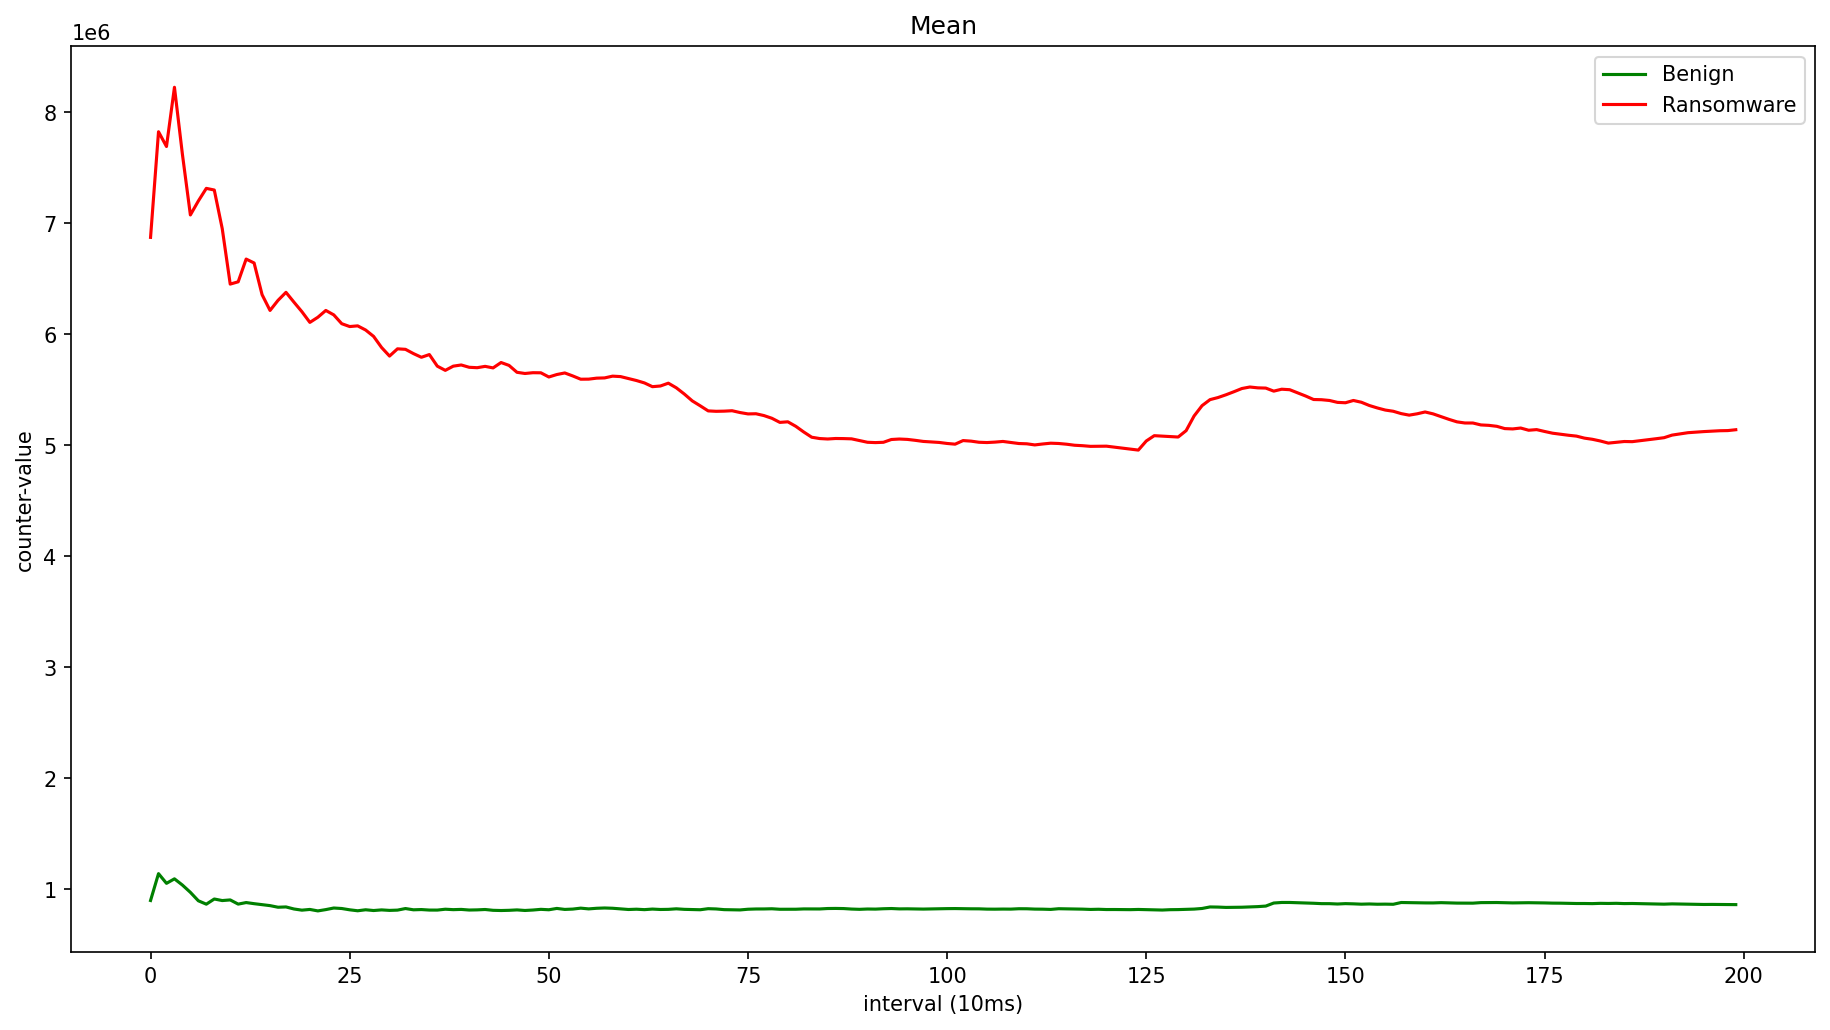

In [27]:
plt.figure(figsize=(15, 8), dpi=150)

benign_means_df["counter-value"].plot(label="Benign", color="green")
ransomware_means_df["counter-value"].plot(label="Ransomware", color="red")

plt.title("Mean")
plt.xlabel("interval (10ms)")
plt.ylabel("counter-value")
plt.legend()
plt.show()